![bse_logo_textminingcourse](https://bse.eu/sites/default/files/bse_logo_small.png)

# Final Paper Submission
# By Tatiana Bakwenye, Sebastien Boxho, Mikel Gallo and Joaquin Ossa

## Table of Contents
- [Part 0: Dataset Selection](#part-0-dataset-selection)
- [Part 1: Pre-processing](#part-1-setting-up-the-problem)
- [Part 3: State of the Art Comparison](#part-3-state-of-the-art-comparison)
  - [a. Full Dataset Training](#a-full-dataset-training)
  - [b. Learning Curve](#b-learning-curve)
  - [c. Technique Comparison](#c-technique-comparison)
  - [d. Methodology Analysis](#d-methodology-analysis)
- [Part 4: Model Distillation](#part-4-model-distillation)
  - [a. Model Distillation](#a-model-distillation)
  - [b. Performance and Speed Comparison](#b-performance-and-speed-comparison)
  - [c. Analysis and Improvements](#c-analysis-and-improvements)


# Setting Up the Problem

#### Objective: Understand and establish the baseline for your chosen dataset

In [1]:
!pip install datasets
!pip install ekphrasis
!pip install langchain
!pip install transformers==4.37.2
!pip install tensorflow==2.15.0
#!pip install OpenAI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.0/273.0 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [36]:
import datasets
import time
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from transformers import TFDistilBertModel
from keras.utils import custom_object_scope
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from gensim import corpora, models
from gensim.matutils import Sparse2Corpus
from scipy.sparse import csr_matrix
import random
from nltk.corpus import stopwords, wordnet
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import spacy
sp = spacy.load('en_core_web_sm')
from tqdm import tqdm
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

import string
from wordcloud import WordCloud
from collections import Counter, defaultdict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)
from keras.callbacks import EarlyStopping
from spacy.matcher import Matcher, PhraseMatcher
from tensorflow.keras import regularizers
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons
from langchain.chat_models import ChatOpenAI
from jinja2 import Template
from langchain.prompts import (
    AIMessagePromptTemplate,
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
# Create a new Matcher
matcher = Matcher(sp.vocab)

## Class Proportion

def class_prop(label):
    train_class = pd.Series(label).value_counts().reset_index()
    #Rename columns
    train_class.columns = ['class', 'count']
    train_class['total'] = train_class['count'].sum()
    train_class['perc'] = train_class['count']/train_class['total']
    print(train_class[['class','count','perc']].round(4))

## Function for Based-Rule classifier
def classify_text(text):
    doc = sp(text)
    matches = matcher(doc)
    if matches:
        return matches  # Return the label of the first match
    else:
        return "UNKNOWN"  # If no match found

### DATA EXPLORATION
def freq_table(df,label):
    train_class = df[label].value_counts().reset_index()
    #Rename columns
    train_class.columns = ['category', 'count']
    train_class['total'] = train_class['count'].sum()
    train_class['perc'] = train_class['count']/train_class['total']
    return train_class[['category','count','perc']].round(4)

## Plot Metric Results
class Metrics:
    def __init__(self):
        self.results = {}

    def run(self, y_true, y_pred, method_name, average='macro'):
        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average=average)
        recall = recall_score(y_true, y_pred, average=average)
        f1 = f1_score(y_true, y_pred, average=average)

        # Store results
        self.results[method_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
        }

    def plot(self):
        # Create subplots
        fig, axs = plt.subplots(2, 2, figsize=(15, 10))

        # Plot each metric
        for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
            ax = axs[i//2, i%2]
            values = [res[metric] * 100 for res in self.results.values()]
            ax.bar(self.results.keys(), values)
            ax.set_title(metric)
            ax.set_ylim(0, 100)

            # Add values on the bars
            for j, v in enumerate(values):
                ax.text(j, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

            # Adjust layout
            ax.set_xticklabels(self.results.keys(), rotation=55)

        plt.tight_layout()
        plt.show()

# Part 0: Dataset Selection

In [4]:
df = load_dataset("carblacac/twitter-sentiment-analysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for carblacac/twitter-sentiment-analysis contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/carblacac/twitter-sentiment-analysis
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the ne

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/149985 [00:00<?, ? examples/s]

Map:   0%|          | 0/61998 [00:00<?, ? examples/s]

Creating json from Arrow format:   0%|          | 0/120 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/30 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/62 [00:00<?, ?ba/s]

Generating train split:   0%|          | 0/119988 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/29997 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/61998 [00:00<?, ? examples/s]

# Part 1: Setting Up the Problem

## a. Bibliography and SOA

## b. Dataset Description

##### TSATC: Twitter Sentiment Analysis Training Corpus     
Original DATASET contains 1,578,627 classified tweets (1 for positive and 0 for negative sentiment).

Our dataset has already been randomly sampled, cleaned, and split into training and testing sets. Both positive and negative classes are well balanced within each subset, and the training subset has been further divided into an 80% training set and a 20% validation set.  

This dataset is an aggregation of two twitter sentiment analysis datasets:  
- University of Michigan Sentiment Analysis competition on Kaggle: https://inclass.kaggle.com/c/si650winter11  
- Twitter Sentiment Corpus by Niek Sanders: http://www.sananalytics.com/lab/twitter-sentiment/

  
Languages: English

In [5]:
## Defining train, validation and test sets
train_data = df['train']['text']
train_labels = df['train']['feeling']

validation_data = df['validation']['text']
validation_labels = df['validation']['feeling']

test_data = df['test']['text']
test_labels = df['test']['feeling']

# Set the seed for reproducibility
np.random.seed(123)

# Define the percentage of data to use
sample_percentage = 0.01

# Sample 30% of the train data
sample_size = int(len(train_data) * sample_percentage)
train_sample_indices = random.sample(range(len(train_data)), sample_size)
train_data = [train_data[i] for i in train_sample_indices]
train_labels = [train_labels[i] for i in train_sample_indices]

# Sample 30% of the validation data
sample_size = int(len(validation_data) * sample_percentage)
validation_sample_indices = random.sample(range(len(validation_data)), sample_size)
validation_data = [validation_data[i] for i in validation_sample_indices]
validation_labels = [validation_labels[i] for i in validation_sample_indices]

# Sample 30% of the test data
sample_size = int(len(test_data) * sample_percentage)
test_sample_indices = random.sample(range(len(test_data)), sample_size)
test_data = [test_data[i] for i in test_sample_indices]
test_labels = [test_labels[i] for i in test_sample_indices]

## Creating Dataframes
df_train = pd.DataFrame({'text':train_data,'label':train_labels})
df_val = pd.DataFrame({'text':validation_data,'label':validation_labels})
df_test = pd.DataFrame({'text':test_data,'label':test_labels})

df

DatasetDict({
    train: Dataset({
        features: ['text', 'feeling'],
        num_rows: 119988
    })
    validation: Dataset({
        features: ['text', 'feeling'],
        num_rows: 29997
    })
    test: Dataset({
        features: ['text', 'feeling'],
        num_rows: 61998
    })
})

### Dataset size

In [6]:
total_rows = len(train_labels) + len(test_labels) + len(validation_labels)
# Calculate train size including validation
Train_size = len(train_labels) + len(validation_labels)
# Calculate Summary
summary_df = pd.DataFrame({'SET': ['TRAIN','TEST', 'TOTAL'], 'ROWS': [Train_size, len(test_labels), total_rows], 'SPLIT': [Train_size/total_rows, len(test_labels)/total_rows,total_rows/total_rows]})
print('Dataset Split [TRAIN, TEST]')
display(summary_df.round(3))

## TRAIN SPLIT
summary_df_train = pd.DataFrame({'SET': ['train','validation', 'TRAIN'], 'ROWS': [len(train_labels), len(validation_labels), Train_size], 'SPLIT': [len(train_labels)/Train_size, len(validation_labels)/Train_size,Train_size/Train_size]})
print('TRAIN Split [train, validation]')
display(summary_df_train.round(3))

Dataset Split [TRAIN, TEST]


,SET,ROWS,SPLIT
0,TRAIN,1498,0.708
1,TEST,619,0.292
2,TOTAL,2117,1.000


TRAIN Split [train, validation]


,SET,ROWS,SPLIT
0,train,1199,0.8
1,validation,299,0.2
2,TRAIN,1498,1.0


### Class distribution

In [7]:
## Class balance of our datasets
print('train')
class_prop(train_labels)
print('validation')
class_prop(validation_labels)
print('test')
class_prop(test_labels)

train
   class  count    perc
0      1    624  0.5204
1      0    575  0.4796
validation
   class  count    perc
0      0    165  0.5518
1      1    134  0.4482
test
   class  count    perc
0      1    321  0.5186
1      0    298  0.4814


### Distribution of text lengths (train set only)

In [8]:
df_train['text_length']= [len(i.split()) for i in df_train['text']]
df_val['text_length']= [len(i.split()) for i in df_val['text']]
df_test['text_length']= [len(i.split()) for i in df_test['text']]
#Calculating Answer Length

In [9]:
for i in df_train['text'][0:5]:
    print(i.split(),'length: ', len(i.split()) )

['You', 'wanna', 'know', 'what', 'I', 'really', 'need', 'right', 'now?', 'I', 'need', 'my', 'girlfriend!', 'D:', 'I', 'miss', 'her', 'so', 'much!', '&lt;333'] length:  20
['@RockingtheRobin', 'I', 'AM', 'IN', 'LOVE', 'WITH', 'THE', 'US', 'CONSTITUTION', '|', 'It', 'would', 'be', 'real', 'cool', 'if', 'our', 'Govt.', 'loved', 'it', 'as', 'much', 'as', 'we', 'do!'] length:  25
['classes', 'over', 'except', 'for', 'my', 'oral', 'final', 'just', 'bought', 'ice', 'cream,', '60-70', 'F', 'weather', 'and', 'sunshine!', 'going', 'outside', 'to', 'sit', 'and', 'write.'] length:  22
['@issie07', 'Ino.', "he's", 'making', 'it', 'WAY', 'to', 'obvious', 'that', "it's", 'about', 'taylor', ':l', 'ii', 'feell', 'so', 'bad', 'for', 'her', 'x'] length:  20
['@keytar', 'I', "didn't", 'think', 'it', 'was', 'that', 'bad.', 'Idris', 'Elba', 'made', 'it', 'bearable', 'for', 'me,', 'I', 'guess.', 'MY', 'TASTE', 'IN', 'GUYS', 'IS', 'WEIRD,', 'IDK.', ':/'] length:  25


Summary Statistics of text_length for positive(1) and negative(0) tweets
            mean  median       std  min  max
label                                       
0      13.859130    13.0  6.859667    1   30
1      13.139423    12.0  7.481692    1   79
   
Plot text_length distribution for positive(1) and negative(0) tweets


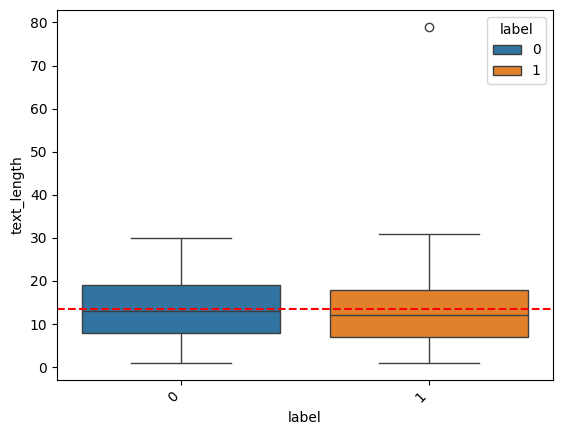

In [10]:
## Summary statistics for text_length
# Calculate multiple statistics
print('Summary Statistics of text_length for positive(1) and negative(0) tweets')
statistics = df_train.groupby('label')['text_length'].agg(['mean', 'median','std', 'min', 'max'])
# Display the result
print(statistics)

print('   ')

print('Plot text_length distribution for positive(1) and negative(0) tweets')
sns.boxplot(data=df_train, x='label', y='text_length',hue = 'label')
#plt.xlim(0, None)
plt.xticks(rotation=45, ha='right')
# Add a horizontal line at the mean of 'reply_length'
mean_reply_length = df_train['text_length'].mean()
plt.axhline(y=mean_reply_length, color='red', linestyle='--', label=f'Mean text Length ({mean_reply_length:.2f})')
# Show the plot
plt.show()

## Data Cleaning
Twitter text requires multiple transformations prior to Preprocessing

In [11]:
# Create a TextPreProcessor instance
text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
               'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
              'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens

    # corpus from which the word statistics are going to be used for word segmentation
    segmenter="twitter",
    # corpus from which the word statistics are going to be used for spell correction
    corrector="twitter",

    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words

    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,

    # list of dictionaries, for replacing tokens extracted from the text, with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons],
    #Remove emoticon
    pre_processor=[lambda x: x.replace('＼(^o^)／', '')]
)

# Pre-process the sentence using TextPreProcessor

def extract_clean(text):
    cleaned_text = ' '.join([word.split('<')[0] for word in text])
    return cleaned_text

def extract_emotions(text):
    emoji_expressions = [token for token in text if token in emoticons.values()]
    return emoji_expressions

def clean_string(text):
    cleaned_text = re.sub(r'\s+', ' ', text)
    cleaned_text = cleaned_text.strip()
    return cleaned_text

def flatten_emotions(emotion_list):
    # Convert the list of emotions into a string
    emotion_string = ', '.join(emotion_list)
    # Use regular expression to find all words inside angle brackets
    emotions = re.findall(r'<([^>]*)>', emotion_string)
    unique_emotions = list(set(emotions))
    combined_emotions = ', '.join(unique_emotions)
    return combined_emotions


def clean_text(df):
# Pre-process all the sentences in df_train['text']
    df['preprocessed_text'] = [text_processor.pre_process_doc(text) for text in df['text']]
    df['clean_text'] = df['preprocessed_text'].apply(extract_clean).apply(clean_string)

    #Getting Hashtags
    df['hashtag'] = df['text'].apply(lambda x: re.findall(r'#(\w+)', x))
    df['hashtag'] = [' '.join(i) for i in df['hashtag']]

    # Iterate through the preprocessed text
    df['emotions'] = df['preprocessed_text'].apply(extract_emotions)
    df['clean_emotions'] = df['emotions'].apply(flatten_emotions)

    df = df[['text','label','text_length','clean_text','clean_emotions','hashtag']]
    return df

df_train = clean_text(df_train)
df_val = clean_text(df_val)
df_test = clean_text(df_test)

/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt


/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading twitter - 1grams ...


## DATA EXPLORATION

### Preprocessor

In [12]:
## Text mining - Preprocessing, CountVectorizing and tf-idf
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.punctuations = set(string.punctuation)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        preprocessed_texts = []
        for text in X:
            # Convert text to lowercase
            #text = text.lower()
            text = "".join([char.lower() for char in text if char not in string.punctuation])
            # Tokenize text
            tokens = word_tokenize(text)
            # Remove stopwords and apply lemmatization
            filtered_tokens = [self.lemmatizer.lemmatize(word) for word in tokens if word not in self.stop_words]
            # Join tokens back into a string
            preprocessed_text = ' '.join(filtered_tokens)
            preprocessed_texts.append(preprocessed_text)

        return preprocessed_texts

In [13]:
sent = ['hello . ! my name is! test .. wuhoo']
pre =TextPreprocessor()
pre.fit(sent)
res = pre.transform(sent)
res

['hello name test wuhoo']

#### Exploring positive and negative words using WordCloud

In [14]:
## Preprocessing texts
pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the pipeline on the training data
pipeline.fit(df_train['clean_text'])

Pipeline(steps=[('prepro', TextPreprocessor()),
                ('vect',
                 CountVectorizer(max_df=0.97, min_df=0.005,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(norm='l1'))])

### TF-IDF Score

In [15]:
def tfidf_term(pipeline,df,sentiment):
# Access the CountVectorizer step from the pipeline
    count_vectorizer = pipeline.named_steps['vect']
    # Fit and transform the data
    tf_idf_pos_matrix = pipeline.transform(df[df['label']==sentiment]['clean_text'])
    # Convert count matrix to DataFrame
    vec_fr_mtx = pd.DataFrame(data=tf_idf_pos_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

    #Creating a dictionary of frequencies for our terms
    feature_names = count_vectorizer.get_feature_names_out()
    # Calculate Term frequency dictionary
    term_tfidf = np.mean(vec_fr_mtx, axis=0)
    #Store in a dictionary
    tfidf_dict = {i: n for i, n in zip(feature_names, term_tfidf)}
    print(len(term_tfidf))
    return feature_names, term_tfidf, tfidf_dict


def transform_to_dataframe(feature_names, score):
    # Create DataFrame with feature names and mean TF-IDF scores
    df = pd.DataFrame({'terms': feature_names, 'score': score})
    # Reset index
    df.reset_index(drop=True, inplace=True)
    return df

# Example usage:
def plot_freq_top(df,top,pos):
    df = df.sort_values(by='score',ascending = False)
    df = df.head(top)
    #We are going to set the

    # Plot the top N terms and their TF-IDF scores
    plt.figure(figsize=(10, 6))
    plt.barh(df['terms'], df['score'], align='center')
    plt.yticks(df['terms'])
    plt.xlabel('Frequency Score')
    plt.title(pos.format(top))
    #plt.xlim(0,0.010)
    plt.gca().invert_yaxis()  # Invert y-axis to display top terms at the top
    plt.show()

---

# Part 2: Data Scientist Challenge (only for the data no models about part 2 in this notebook)
## a. BERT Model with Limited Data

In the following exercises we will work with clean text.

In [16]:
train_data_clean = df_train['clean_text']
validation_data_clean = df_val['clean_text']
test_data_clean = df_test['clean_text']

In [17]:
# First, we'll select 32 random rows from the DataFrame using the sample method.
df_train_32 = df_train.sample(n=32)

In [18]:
train_data_32 = df_train_32['clean_text']
train_labels_32 = df_train_32['label']

### BERT SETUP

In [19]:
checkpoint="cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModel.from_pretrained(checkpoint)

batch_size=  8 # impossible to have bigger batch as far as we have just 32 observations in the train
max_length= 40 # fine for the length of the sentences in our dataset - changed it according to the distribution
rate =     0.5 # dropout parameters - tried different options, 0.5 still performs better
num_labels = len(np.unique(validation_labels))

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/499M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaModel.

All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [20]:
## Input
input_ids_in = tf.keras.layers.Input(shape=(max_length,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(max_length,), name='masked_token', dtype='int32')

# Embedding layers
embedding_layer = model(input_ids_in, attention_mask=input_masks_in)[0][:,0,:]
output_layer = tf.keras.layers.Dropout(rate)(embedding_layer)

# One dense layer to process the last layer
output = tf.keras.layers.Dense(num_labels,
                               kernel_initializer="glorot_uniform",
                               activation='softmax')(output_layer)

bert_model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = output)

bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_token (InputLayer)    [(None, 40)]                 0         []                            
                                                                                                  
 masked_token (InputLayer)   [(None, 40)]                 0         []                            
                                                                                                  
 tf_roberta_model (TFRobert  TFBaseModelOutputWithPooli   1246456   ['input_token[0][0]',         
 aModel)                     ngAndCrossAttentions(last_   32         'masked_token[0][0]']        
                             hidden_state=(None, 40, 76                                           
                             8),                                                              

In [21]:
def get_batches(X_train, y_train, tokenizer, batch_size, max_length):
    """
    Objective: Create a generator that yields batches of tokenized text and corresponding labels.
               The data is shuffled and looped through indefinitely.

    Inputs:
        - X_train (np.array): Array of text data (features).
        - y_train (np.array): Array of labels.
        - tokenizer (DistilBertTokenizer): Tokenizer for text data.
        - batch_size (int): Size of each batch.
        - max_length (int): Maximum length of tokenized sequences.
    Outputs:
        - Generator yielding batches of (inputs, targets).
    """

    # Pre-tokenize the entire dataset
    inputs = tokenizer.batch_encode_plus(list(X_train), add_special_tokens=True, max_length=max_length,
                                         padding='max_length', return_attention_mask=True,
                                         return_token_type_ids=True, truncation=True,
                                         return_tensors="np")

    input_ids = np.asarray(inputs['input_ids'], dtype='int32')
    attention_masks = np.asarray(inputs['attention_mask'], dtype='int32')

    # Shuffle and yield batches
    while True:
        X_train, y_train, input_ids, attention_masks = shuffle(X_train, y_train, input_ids, attention_masks, random_state=11)

        for i in range(0, len(X_train), batch_size):
            yield [input_ids[i:i + batch_size], attention_masks[i:i + batch_size]], y_train[i:i + batch_size]

In [22]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(train_labels_32).reshape(-1, 1)).toarray()

## b. Dataset Augmentation

Text data augmentation approaches include:

+ Synonym Replacement: Replace words with their synonyms.
+ Random Insertion: Insert random words into the text.
+ Random Deletion: Randomly delete words from the text.
+ Random Swap: Swap two words randomly in the text.
+ Text Masking: Replace words or phrases with a mask token.

As far as we have very small dataset (DTM is of shape 32:305) I chose not to work with deletion or masking, but rather with synonyms. I thought of two approaches to do so:

### Data Augmentation: Manually Gathered Synonyms

First approach was to analyse the most common words associated with positive and negative sentiments and manually create a dictionary with synonyms. Then, I augmented data with 50 (tried more, but performance was worse, probably bacause of the limited variety of the changes and the fact, that probably misclassified observations could be misclassified now twice) observations and trained the same BERT with augmented data.

In [23]:
# I had slightly different approach, but changed it to Mikel's so to have the same logic throughout the notebook. Will have to move this and next cell to the first exercise later on.
## Preprocessing texts
pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the pipeline on the training data
pipeline.fit(df_train_32['clean_text'])

Pipeline(steps=[('prepro', TextPreprocessor()),
                ('vect',
                 CountVectorizer(max_df=0.97, min_df=0.005,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(norm='l1'))])

In [24]:
## Posive Terms
pos_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train_32,1)
pos_tf_idf = transform_to_dataframe(pos_feature_names,term_tfidf)

373


In [25]:
## Posive Terms
neg_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train_32,0)
neg_tf_idf = transform_to_dataframe(neg_feature_names,term_tfidf)

373


I got top 'most positive' and 'most negative' terms, manually chose some of them and assigned synonyms.

In [26]:
# Sort the dataframe by the 'score' column in decreasing order
neg_tf_idf_sorted = neg_tf_idf.sort_values(by='score', ascending=False)
pos_tf_idf_sorted = pos_tf_idf.sort_values(by='score', ascending=False)

# Extract the top 25 terms from the sorted dataframe
top_terms_neg = neg_tf_idf_sorted['terms'].head(25).tolist()
top_terms_pos = pos_tf_idf_sorted['terms'].head(25).tolist()

# Print the list of top 25 terms
print(top_terms_neg)
print(top_terms_pos)

['course', 'would course', 'working', 'twitter working', 'twitter', 'would', 'five fighting', 'five', 'fighting', 'superman', 'fighting superman', 'like', 'yup', 'work', 'late', 'participate think', 'think late', 'participate', 'wanted', 'wanted participate', 'think', 'maybe', 'go warped', 'worry', 'work go']
['thanks', 'even', 'awh even', 'awh', 'good', 'chillnn', 'chillnn add', 'add', 'add myspace', 'myspace', 'ok', 'welcome agree', 'good looking', 'looking', 'agree', 'agree good', 'welcome', 'come', 'god bless', 'ok good', 'good nite', 'nite', 'nite god', 'bless', 'god']


In [27]:
synonyms = {
    'go': ['move', 'travel', 'proceed', 'advance'],
    'envy': ['jealousy', 'resentment', 'desire'],
    'follower': ['adherent', 'disciple', 'supporter', 'devotee'],
    'want': ['desire', 'wish', 'crave', 'yearn'],
    'long': ['lengthy', 'extended', 'prolonged', 'distant'],
    'got': ['obtained', 'acquired', 'received', 'possessed'],
    'back': ['rear', 'behind', 'spine', 'reverse'],
    'hear': ['listen', 'perceive', 'catch', 'comprehend'],
    'woke': ['awake','conscious', 'comprehend'],
    'ago': ['in the past', 'back', 'before', 'previously'],
    'get back': ['retrieve', 'return', 'reclaim', 'regain'],
    'long ago': ['many years ago', 'ages ago', 'centuries ago'],
    'ghost image': ['phantom picture', 'spirit image'],
    'cry': ['weep', 'sob', 'shed tears'],
    'much': ['a lot', 'many', 'plenty', 'abundant'],
    'rock': ['stone', 'boulder', 'pebble', 'rocky'],
    'thank': ['express gratitude', 'show appreciation', 'give thanks', 'acknowledge'],
    'fair': ['just', 'acceptable', 'impartial', 'reasonable'],
    'enough': ['sufficient', 'adequate', 'plenty'],
    'like': ['enjoy', 'admire', 'favor', 'approve of'],
    'night': ['evening', 'darkness', 'nighttime', 'nocturnal'],
}

In [28]:
# Function to replace key word with a random synonym
def replace_with_synonym(text, synonyms_dict):
    words = text.split()
    for i, word in enumerate(words):
        if word in synonyms_dict:
            synonyms = synonyms_dict[word]
            # Randomly select a synonym
            new_word = random.choice(synonyms)
            # Replace the key word with the selected synonym
            words[i] = new_word
    return ' '.join(words)

# Initialize an empty DataFrame to store new observations
new_rows = pd.DataFrame(columns=df_train_32.columns)

# Generate additional 50 rows
while len(new_rows) < 50:
    # Identify rows with words from synonyms dictionary
    relevant_rows = df_train_32[df_train_32['clean_text'].apply(lambda x: any(word in synonyms for word in x.split()))]
    # Duplicate each relevant row and replace key word with synonym
    for idx, row in relevant_rows.iterrows():
        new_row = row.copy()
        new_row['clean_text'] = replace_with_synonym(row['clean_text'], synonyms)
        new_rows = new_rows.append(new_row, ignore_index=True)
        if len(new_rows) >= 50:
            break

# Display the new DataFrame with 50 new rows
new_rows.head(10)

<ipython-input-28-383be659130a>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)


,text,label,text_length,clean_text,clean_emotions,hashtag
0,@stayupxgetdown don't worry... everything wil...,0,13,do not worry . everything will work itself out...,,
1,love seinfeld. got the scene it game. nobody ...,0,11,love seinfeld . received the scene it game . n...,,
2,@larizz3 sorry about your teeths I had a dre...,0,23,sorry about your teeths i had a dream my entir...,,
3,anyone want to loan me like 200 bucks?,0,8,anyone wish to loan me enjoy bucks ?,,
4,@BitterTea ugh but they are so unattractive! u...,0,21,ugh but they are so unattractive ! u might as ...,,
5,Going with the boy to check on his business ca...,1,24,going with the boy to check on his business ca...,,
6,I am not doing v much... I have a snotty teeth...,0,26,i am not doing v abundant . i have a snotty te...,,
7,I'm going to school in a minute.... It's gonna...,0,13,i am going to school in a minute . it ' s gonn...,,
8,@CarlyBarnsley I would like to go to Wilmingto...,1,11,i would approve of to travel to wilmingto soon...,,
9,@bflywears OMG NOOOOOOOOOOO ur leaving hella e...,0,20,omg no ur leaving hella early ? i feel favor s...,,


In [29]:
# Add new_rows to df_train_32
augmented_df = pd.concat([df_train_32, new_rows], ignore_index=True)

# Display the augmented DataFrame shape
print(augmented_df.shape)

(82, 6)


In [30]:
# Define data and labels
augmented_df_data = augmented_df['clean_text']
augmented_df_label = augmented_df['label']

Note, that we will work with the same BERT model, so I will not change anything in the model architecture.

### Data Augmentation: Synonyms from WordNet

I didn't choose to work with WordNet packages in the beginning, as far as synonyms look kind of random and don't usually properly reflect the meaning of the word (probably because of multiple meanings) and don't consider the context. But as far as I couldn't manually assign synonyms to all (or at least many) tokens, I decided to try WordNet as well.

So the second approach is to rendomly change 30% of the tokens in the comments (I tried different shares, 30% performed better) and add 32*20 (tried different numbers as well) new rows.

In [31]:
# Function to get synonyms from WordNet
def get_wordnet_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to replace random words with WordNet synonyms
def replace_with_synonym_wordnet(text):
    words = text.split()
    for i, word in enumerate(words):
        # Randomly decide whether to replace the word with a synonym
        if random.random() < 0.3:  # Adjust the probability as needed
            # Get WordNet synonyms for the word
            synonyms = get_wordnet_synonyms(word)
            if synonyms:
                # Randomly select a synonym
                new_word = random.choice(synonyms)
                # Replace the word with the selected synonym
                words[i] = new_word
    return ' '.join(words)

# Duplicate each row and replace random words with WordNet synonyms
new_rows = pd.DataFrame(columns=df_train_32.columns)
for idx, row in df_train_32.iterrows():
    for _ in range(20):  # Duplicate 20 times - can be adjusted as needed
        # Duplicate the row
        new_row = row.copy()
        # Replace random words in the 'clean_text' column with WordNet synonyms
        new_row['clean_text'] = replace_with_synonym_wordnet(row['clean_text'])
        # Append the new row to the DataFrame
        new_rows = new_rows.append(new_row, ignore_index=True)

# Display the new DataFrame with duplicated rows and random word replacements
new_rows.head(10)

<ipython-input-31-5f1b6b51e9c4>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)


,text,label,text_length,clean_text,clean_emotions,hashtag
0,Yes! Julie Christie..Donald Sutherland... red ...,1,7,yes ! julie christie . donald sutherland . Bol...,,welshmovies
1,Yes! Julie Christie..Donald Sutherland... red ...,1,7,yes ! julie christie . donald sutherland . red...,,welshmovies
2,Yes! Julie Christie..Donald Sutherland... red ...,1,7,yes ! julie Dame_Agatha_Mary_Clarissa_Christie...,,welshmovies
3,Yes! Julie Christie..Donald Sutherland... red ...,1,7,yes ! julie Dame_Agatha_Mary_Clarissa_Christie...,,welshmovies
4,Yes! Julie Christie..Donald Sutherland... red ...,1,7,yes ! julie christie . donald sutherland . red...,,welshmovies
5,Yes! Julie Christie..Donald Sutherland... red ...,1,7,yes ! julie christie . donald Joan_Sutherland ...,,welshmovies
6,Yes! Julie Christie..Donald Sutherland... red ...,1,7,yes ! julie christie . donald sutherland . red...,,welshmovies
7,Yes! Julie Christie..Donald Sutherland... red ...,1,7,yes ! julie christie . donald sutherland . red...,,welshmovies
8,Yes! Julie Christie..Donald Sutherland... red ...,1,7,yes ! julie christie . donald sutherland . red...,,welshmovies
9,Yes! Julie Christie..Donald Sutherland... red ...,1,7,yes ! julie christie . donald sutherland . sca...,,welshmovies


From the printed first rows you actually may see (comparing text and clean text, which was duplicated), that synonyms are kind of weird.

In [32]:
# Add new_rows to df_train_32
augmented_w_df = pd.concat([df_train_32, new_rows], ignore_index=True)

# Display the augmented DataFrame
print(augmented_w_df.shape)

(672, 6)


In [33]:
augmented_w_df_data = augmented_w_df['clean_text']
augmented_w_df_label = augmented_w_df['label']

---

# c. Zero-Shot Learning with LLM
#### For the Zero-Shot setup we found different LLM models from Huggingface which we tried to see which one gave us the best accuracy testing them with the validation data. Finally it was "facebook/bart-large-mnli" the one it gave us the best results

In [37]:
from transformers import pipeline
model_name = "facebook/bart-large-mnli"  # Adjust model name as needed

df_val_sampled = df_val.sample(n=299, random_state=42)
sampled_list1 = (df_val_sampled['text']).tolist()

# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model=model_name)

# Define the candidate labels
candidate_labels = ['positive', 'negative']

# Store the predictions for each item in a list
predictions = []

# Iterate over each text sample in test_data
for text_sample in sampled_list1:
    # Use the classifier pipeline to predict the label
    result = classifier(text_sample, candidate_labels)

    # Get the label with the highest score
    if result['scores'][0] >= result['scores'][1]:
        predicted_label = result['labels'][0]
    else:
        predicted_label = result['labels'][1]

    # Append the predicted label to the predictions list
    predictions.append(predicted_label)

# Print the predictions
print(predictions)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

['negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'po

In [38]:
zero_predictions = [1 if prediction == 'positive' else 0 for prediction in predictions]

# Update the "label" column with values from sampled_list2
df_val_sampled['label'] = zero_predictions

# Display the updated DataFrame
df_val_sampled.head()

                                                  text  label  text_length  \
281  @jamestopp Dear boy I know the feeling! mines ...      0           10   
265  Hello Twitters! It's not nice outside. It's wi...      0           15   
164              @BonnieJene Hope they find them soon.      1            6   
9    26-year-old Jose Carrasquillo tied to a dirty ...      0           21   
77   @perrynoble  praying for you bruda! just smile...      1           12   

                                            clean_text clean_emotions hashtag  
281       dear boy i know the feeling ! mines sick too                         
265  hello twitters ! it ' s not nice outside . it ...                         
164                         hope they find them soon .                         
9    - year - old jose carrasquillo tied to a dirty...                         
77   praying for you bruda ! just smile and love pe...                         


#### Now we train our Roberta model once again adding the data obtained with Zero-Shot to the 32 labeled

In [39]:
# Add new_rows to df_train_32
augmented_zero_df = pd.concat([df_train_32, df_val_sampled], ignore_index=True)

# Display the augmented DataFrame
print(augmented_zero_df.shape)

(331, 6)


In [40]:
augmented_zero_df_data = augmented_zero_df['clean_text']
augmented_zero_df_label = augmented_zero_df['label']

#### We get a very big increase in the performance of our model, probably because of the size of the data, since we were training our model with only 32 samples and now we are adding 300 more samples, even though they are not 100% accurate, is still gives a lot more information for the model to work better

---

# d. Data Generation with LLM

In [48]:
# Load csv file containing the generated tweets
df = pd.read_csv("/content/gpt_tweets.csv")

df['Context'] = df['Context'].str.strip()
df.rename(columns={'Tweet': 'text', 'Sentiment': 'label'}, inplace=True)

In [49]:
# Inspect Data
print(df.shape)
df.isna().sum()

(1135, 3)


text       0
label      0
Context    0
dtype: int64

In [50]:
df['text_length'] = 0
df = clean_text(df)

train_data_generated = df["text"]
train_labels_generated = df["label"]

---

# Part 3: State of the Art Comparison

## a. Full Dataset Training

In [54]:
metrics_comp = Metrics()

In [57]:
# Define observation shares
observation_shares = [0.01, 0.10, 0.25, 0.5, 0.75, 1]

# List to store validation predictions for all models
all_valid_preds = []

# List to store histories for all models
all_histories = []

for share in observation_shares:
    # Calculate the number of observations
    obs_count = int(len(df_train) * share)

    # Sample from the DataFrame
    df_train_sampled = df_train.sample(n=obs_count)

    # Extract features and labels
    train_data_sampled = df_train_sampled['clean_text']
    train_labels_sampled = df_train_sampled['label']

    # One-hot encode the labels
    y_train_sampled = enc.fit_transform(np.array(train_labels_sampled).reshape(-1, 1)).toarray()

    # Convert validation labels to one-hot encoding
    y_valid = enc.transform(np.array(validation_labels).reshape(-1, 1)).toarray()

    # Define steps per epoch
    steps_per_epoch = int(len(train_data)/batch_size)

    # Generate batches for training data
    train_batches = get_batches(train_data_sampled, y_train_sampled, tokenizer, batch_size, max_length)

    # Generate batches for validation data
    valid_batches = get_batches(validation_data, y_valid, tokenizer, batch_size, max_length)

    # Compile the model
    bert_model.compile(
        optimizer=Adam(2e-5),
        metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()],
        loss=tf.keras.losses.CategoricalCrossentropy()
    )

    # Train the model and record the history
    history = bert_model.fit(
        train_batches,
        epochs=5,
        steps_per_epoch=steps_per_epoch,
        validation_data=valid_batches,
        validation_steps=len(validation_data) // batch_size,
    )
    #callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)]

    # Append the history to the list
    all_histories.append(history)

    # Get the inputs tokenized from the validation set
    inputs = tokenizer.batch_encode_plus(list(test_data),
                                         add_special_tokens=True,
                                         max_length=max_length,
                                         padding='max_length',
                                         return_attention_mask=True,
                                         return_token_type_ids=True,
                                         truncation=True)

    # Extract input_ids and attention mask
    inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
                    np.asarray(inputs['attention_mask'], dtype='int32')]

    # Get predictions for the validation set
    valid_preds = bert_model.predict(inputs_valid)
    valid_preds = np.argmax(valid_preds, axis=1)

    # Append predictions to the list
    all_valid_preds.append(valid_preds)
    metrics_comp.run(test_labels, valid_preds, f"share_{int(share * 100)}%")
    tf.keras.backend.clear_session()

Epoch 1/5


149/149 [==============================] - 181s 996ms/step - loss: 0.0306 - recall_1: 0.9891 - precision_1: 0.9891 - val_loss: 1.4876 - val_recall_1: 0.7601 - val_precision_1: 0.7601
Epoch 2/5
149/149 [==============================] - 144s 966ms/step - loss: 2.2798e-04 - recall_1: 1.0000 - precision_1: 1.0000 - val_loss: 1.7766 - val_recall_1: 0.7423 - val_precision_1: 0.7423
Epoch 3/5
149/149 [==============================] - 143s 957ms/step - loss: 7.8057e-05 - recall_1: 1.0000 - precision_1: 1.0000 - val_loss: 1.8432 - val_recall_1: 0.7423 - val_precision_1: 0.7423
Epoch 4/5
149/149 [==============================] - 143s 959ms/step - loss: 5.9114e-05 - recall_1: 1.0000 - precision_1: 1.0000 - val_loss: 1.8426 - val_recall_1: 0.7595 - val_precision_1: 0.7595
Epoch 5/5
20/20 [==============================] - 13s 487ms/step
Epoch 1/5


149/149 [==============================] - 194s 1s/step - loss: 0.1629 - recall: 0.9408 - precision: 0.9408 - val_loss: 1.2285 - val_recall: 0.7872 - val_precision: 0.7872
Epoch 2/5
149/149 [==============================] - 126s 847ms/step - loss: 0.0017 - recall: 1.0000 - precision: 1.0000 - val_loss: 1.4623 - val_recall: 0.8007 - val_precision: 0.8007
Epoch 3/5
149/149 [==============================] - 120s 806ms/step - loss: 1.0318e-04 - recall: 1.0000 - precision: 1.0000 - val_loss: 1.3842 - val_recall: 0.8076 - val_precision: 0.8076
Epoch 4/5
149/149 [==============================] - 112s 754ms/step - loss: 1.4792e-04 - recall: 1.0000 - precision: 1.0000 - val_loss: 1.6028 - val_recall: 0.8110 - val_precision: 0.8110
Epoch 5/5
20/20 [==============================] - 10s 326ms/step
Epoch 1/5


149/149 [==============================] - 135s 720ms/step - loss: 0.3160 - recall: 0.8912 - precision: 0.8912 - val_loss: 0.6315 - val_recall: 0.8412 - val_precision: 0.8412
Epoch 2/5
149/149 [==============================] - 104s 697ms/step - loss: 0.0085 - recall: 0.9983 - precision: 0.9983 - val_loss: 1.1500 - val_recall: 0.8282 - val_precision: 0.8282
Epoch 3/5
149/149 [==============================] - 104s 699ms/step - loss: 0.0468 - recall: 0.9881 - precision: 0.9881 - val_loss: 0.6250 - val_recall: 0.8385 - val_precision: 0.8385
Epoch 4/5
149/149 [==============================] - 106s 711ms/step - loss: 0.0119 - recall: 0.9940 - precision: 0.9940 - val_loss: 1.1617 - val_recall: 0.8419 - val_precision: 0.8419
Epoch 5/5
20/20 [==============================] - 9s 323ms/step
Epoch 1/5


149/149 [==============================] - 140s 744ms/step - loss: 0.2948 - recall: 0.8942 - precision: 0.8942 - val_loss: 0.5648 - val_recall: 0.8514 - val_precision: 0.8514
Epoch 2/5
149/149 [==============================] - 110s 740ms/step - loss: 0.0574 - recall: 0.9815 - precision: 0.9815 - val_loss: 0.9537 - val_recall: 0.8351 - val_precision: 0.8351
Epoch 3/5
149/149 [==============================] - 107s 720ms/step - loss: 0.0274 - recall: 0.9899 - precision: 0.9899 - val_loss: 0.9488 - val_recall: 0.8591 - val_precision: 0.8591
Epoch 4/5
149/149 [==============================] - 117s 789ms/step - loss: 0.0230 - recall: 0.9966 - precision: 0.9966 - val_loss: 1.2216 - val_recall: 0.8454 - val_precision: 0.8454
Epoch 5/5
20/20 [==============================] - 10s 334ms/step
Epoch 1/5


149/149 [==============================] - 140s 744ms/step - loss: 0.2939 - recall: 0.9292 - precision: 0.9292 - val_loss: 0.5134 - val_recall: 0.8412 - val_precision: 0.8412
Epoch 2/5
149/149 [==============================] - 105s 703ms/step - loss: 0.0633 - recall: 0.9773 - precision: 0.9773 - val_loss: 0.6930 - val_recall: 0.8488 - val_precision: 0.8488
Epoch 3/5
149/149 [==============================] - 105s 708ms/step - loss: 0.0192 - recall: 0.9941 - precision: 0.9941 - val_loss: 1.0553 - val_recall: 0.8282 - val_precision: 0.8282
Epoch 4/5
149/149 [==============================] - 105s 702ms/step - loss: 0.0501 - recall: 0.9797 - precision: 0.9797 - val_loss: 0.7260 - val_recall: 0.8385 - val_precision: 0.8385
Epoch 5/5
20/20 [==============================] - 9s 327ms/step
Epoch 1/5


149/149 [==============================] - 139s 742ms/step - loss: 0.1508 - recall: 0.9664 - precision: 0.9664 - val_loss: 0.5012 - val_recall: 0.8378 - val_precision: 0.8378
Epoch 2/5
149/149 [==============================] - 110s 742ms/step - loss: 0.0325 - recall: 0.9882 - precision: 0.9882 - val_loss: 0.9619 - val_recall: 0.8316 - val_precision: 0.8316
Epoch 3/5
149/149 [==============================] - 115s 772ms/step - loss: 0.0232 - recall: 0.9941 - precision: 0.9941 - val_loss: 0.8017 - val_recall: 0.8351 - val_precision: 0.8351
Epoch 4/5
149/149 [==============================] - 108s 722ms/step - loss: 0.0038 - recall: 0.9983 - precision: 0.9983 - val_loss: 1.4011 - val_recall: 0.8076 - val_precision: 0.8076
Epoch 5/5
20/20 [==============================] - 12s 443ms/step


## b. Learning Curve

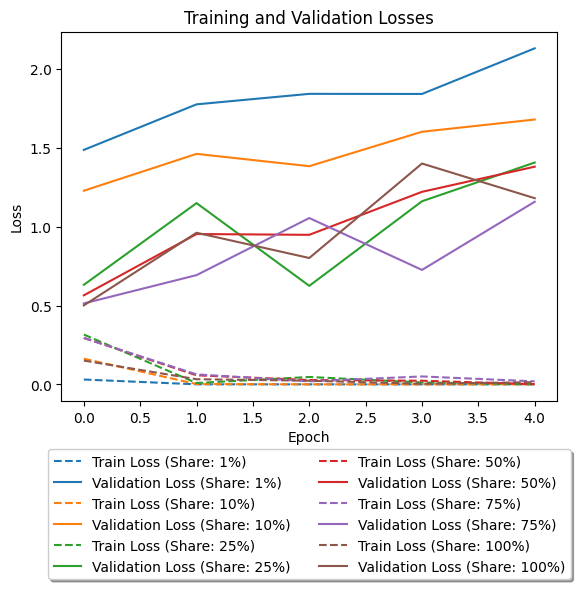

In [58]:
# Define a colormap with enough distinct colors
colors = plt.cm.tab10.colors

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot losses for all histories
for i, history in enumerate(all_histories):
    # Extract training and validation losses
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot training and validation losses with appropriate color
    color_index = i % len(colors)
    ax.plot(train_loss, label=f'Train Loss (Share: {int(observation_shares[i] * 100)}%)', linestyle='--', color=colors[color_index])
    ax.plot(val_loss, label=f'Validation Loss (Share: {int(observation_shares[i] * 100)}%)', color=colors[color_index])

# Set title and labels
ax.set_title('Training and Validation Losses')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=2)  # Moving legend to the bottom

# Show plot
plt.show()

<ipython-input-3-c69f3aa3134e>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.results.keys(), rotation=55)


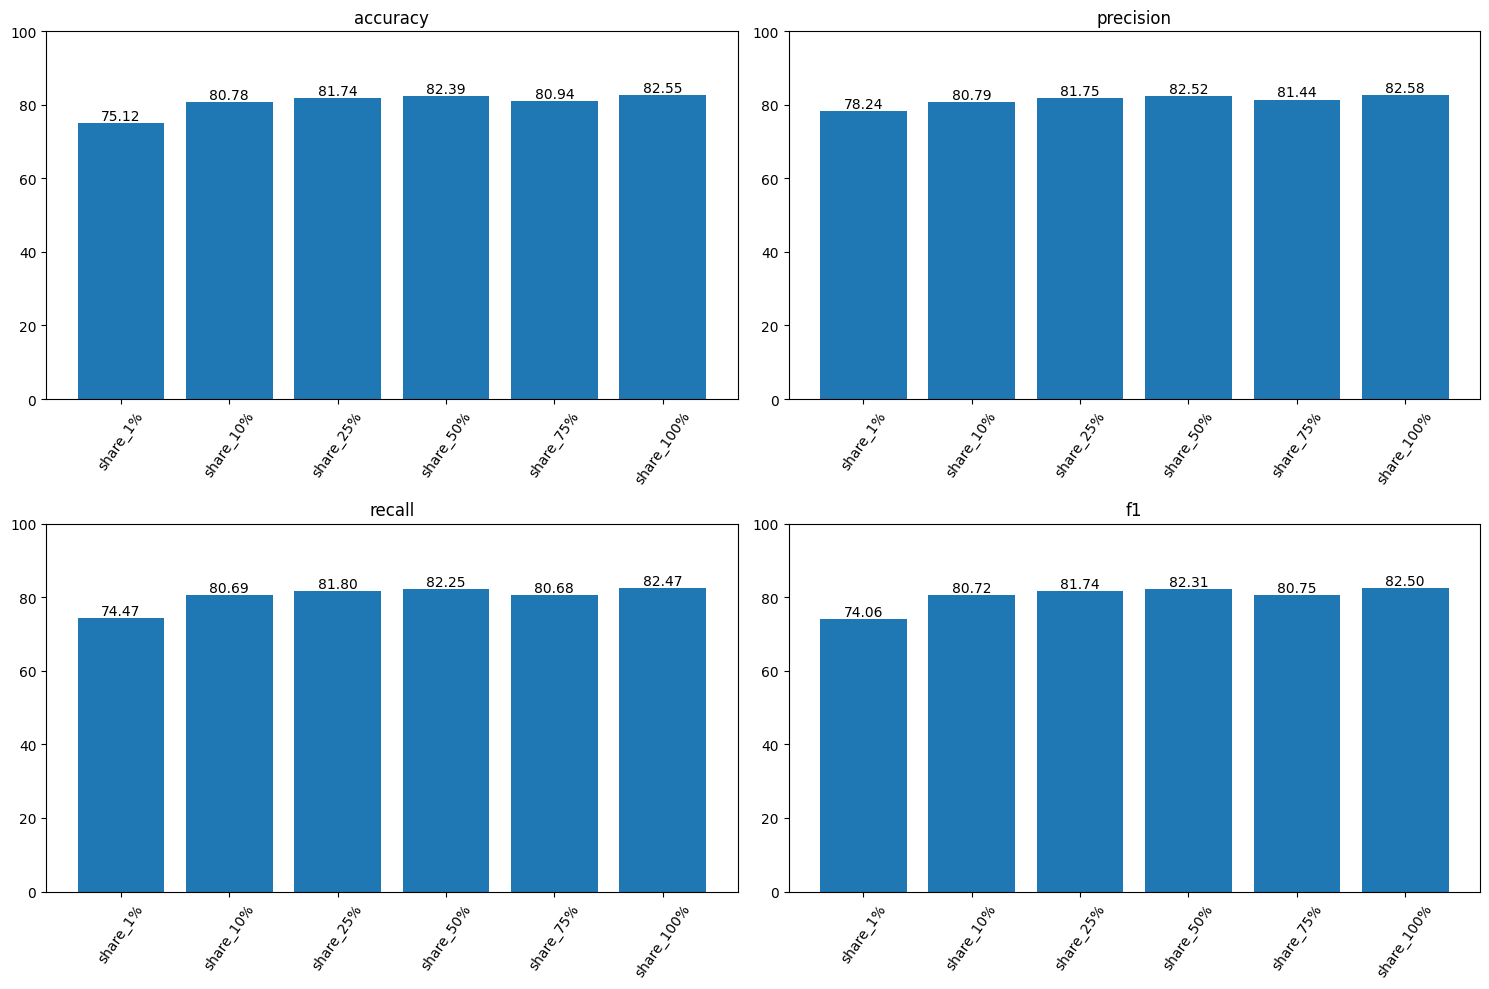

In [59]:
metrics_comp.plot()

#### As expected, we can observe a trend of increasing performance with the expansion of the training dataset, attributed to the provision of more diverse and representative examples. This enables the model to learn more robust patterns and relationships, consequently enhancing its predictive accuracy and generalization capability. However, beyond a certain point, the improvement becomes less significant, and the model may reach a stagnation where additional data fails to introduce substantial new variety for further learning

## c. Technique Comparison
## Pre-train the (freezed) model with the different techniques explored before

In [60]:
# Apply the different techniques and compare their perfromance
# 1. 32 label, 2. Synonyms, 3. Zero Shot, 4. LLM Tweets
techniques_names = ["32 Labels","Augmented Synonyms","Zero Shot","Generated Tweets"]
techniques = [[train_data_32,train_labels_32],[augmented_w_df_data,augmented_w_df_label],[augmented_zero_df_data, augmented_zero_df_label],[train_data_generated,train_labels_generated]]

Model : 32 Labels
Fit Freezed layer...
Epoch 1/2
4/4 [==============================] - 15s 199ms/step - loss: 0.0061 - recall: 1.0000 - precision: 1.0000
Epoch 2/2
20/20 [==============================] - 12s 422ms/step
Fit unfreezd layer...
Epoch 1/2


149/149 [==============================] - 141s 745ms/step - loss: 0.0530 - recall_1: 0.9933 - precision_1: 0.9933
Epoch 2/2
20/20 [==============================] - 11s 407ms/step
Model : Augmented Synonyms
Fit Freezed layer...
Epoch 1/2
84/84 [==============================] - 32s 188ms/step - loss: 0.3246 - recall: 0.9345 - precision: 0.9345
Epoch 2/2
20/20 [==============================] - 11s 386ms/step
Fit unfreezd layer...
Epoch 1/2


149/149 [==============================] - 140s 739ms/step - loss: 0.0232 - recall_1: 0.9950 - precision_1: 0.9950
Epoch 2/2
20/20 [==============================] - 11s 379ms/step
Model : Zero Shot
Fit Freezed layer...
Epoch 1/2
41/41 [==============================] - 20s 162ms/step - loss: 0.9575 - recall: 0.8140 - precision: 0.8140
Epoch 2/2
20/20 [==============================] - 10s 368ms/step
Fit unfreezd layer...
Epoch 1/2


149/149 [==============================] - 138s 730ms/step - loss: 0.0376 - recall_1: 0.9916 - precision_1: 0.9916
Epoch 2/2
20/20 [==============================] - 10s 339ms/step
Model : Generated Tweets
Fit Freezed layer...
Epoch 1/2
141/141 [==============================] - 37s 154ms/step - loss: 1.0088 - recall: 0.8387 - precision: 0.8387
Epoch 2/2
20/20 [==============================] - 10s 326ms/step
Fit unfreezd layer...
Epoch 1/2


149/149 [==============================] - 131s 691ms/step - loss: 0.0183 - recall_1: 0.9958 - precision_1: 0.9958
Epoch 2/2
20/20 [==============================] - 9s 320ms/step


<ipython-input-3-c69f3aa3134e>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.results.keys(), rotation=55)


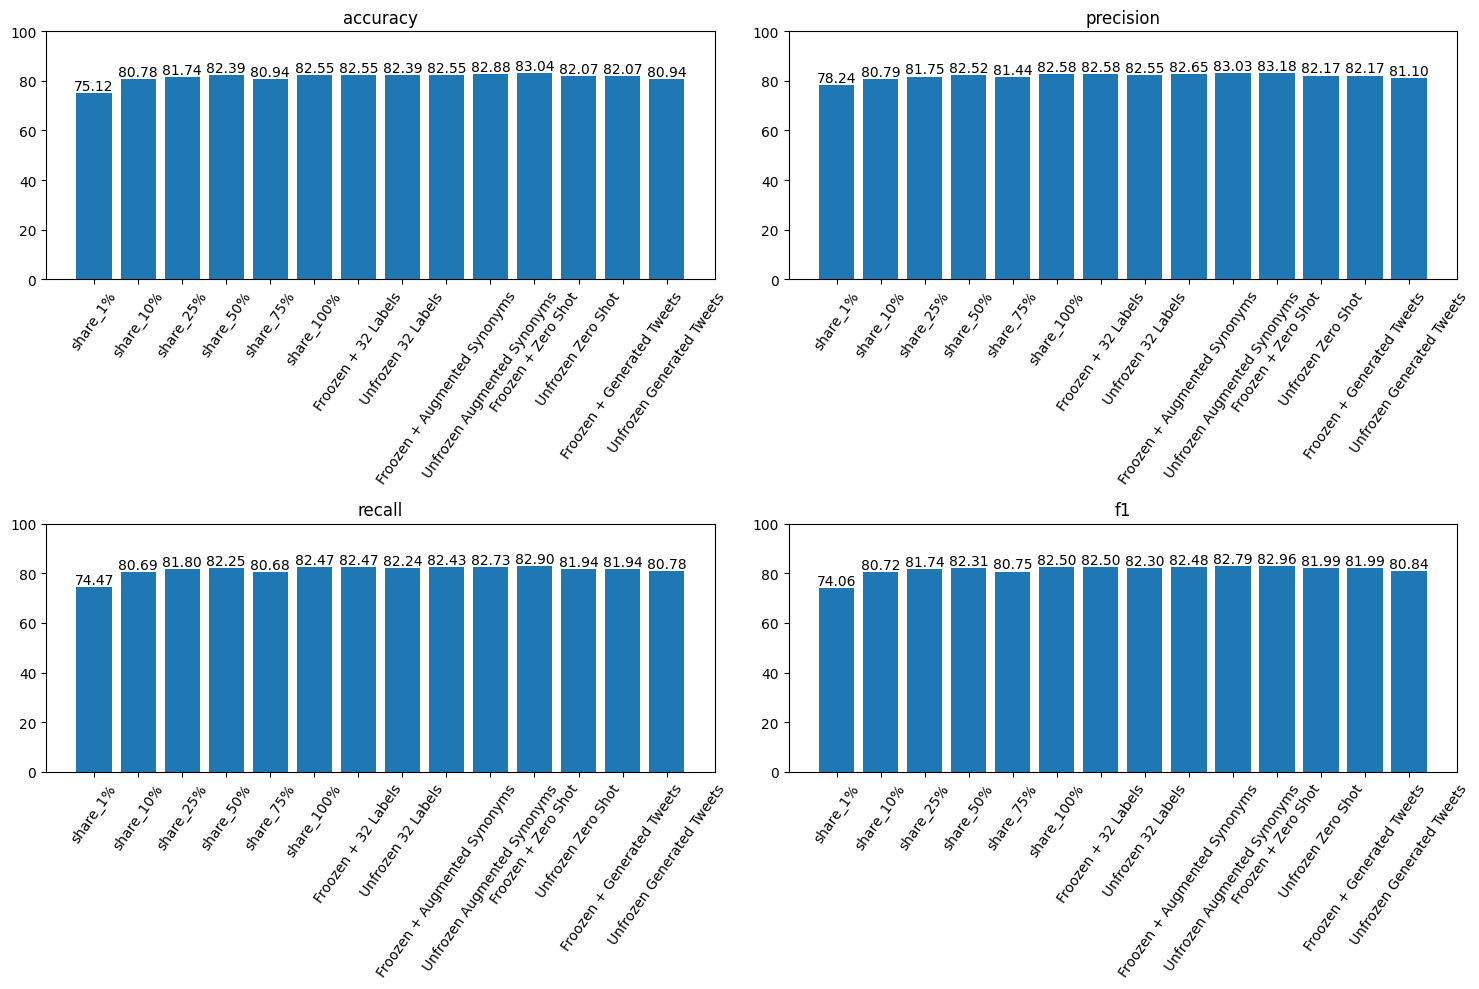

In [61]:
histories = []
teacher_model = None
best_loss = float('inf')
i = 0

for train_tec,y_tec in techniques:
    print("Model :",techniques_names[i])
    model_tec = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = output)
    # To freeze BERT parameters (look at the trainable parameters below)
    model_tec.layers[2].trainable = False

    X_train = np.array(train_tec)

    y_train = enc.fit_transform(np.array(y_tec).reshape(-1, 1)).toarray()

    steps_per_epoch = int(len(X_train)/batch_size)

    batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

    model_tec.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                   tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

    print("Fit Freezed layer...")
    model_tec.fit(batches, epochs=2, steps_per_epoch=steps_per_epoch)

    # Test the model
    test_preds = model_tec.predict(inputs_valid)
    test_preds = np.argmax(test_preds, axis=1)

    # get the final metrics
    metrics_comp.run(test_labels, test_preds, f"Froozen + {techniques_names[i]}")

    print("Fit unfreezd layer...")
    model_tec.layers[2].trainable = True

    steps_per_epoch = int(len(train_data)/batch_size)
    X_train = np.array(train_data_clean)

    y_train = enc.fit_transform(np.array(train_labels).reshape(-1, 1)).toarray()

    # Train on the whole NN
    batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

    model_tec.compile(optimizer=Adam(2e-5),
                      metrics=[tf.keras.metrics.Recall(),
                      tf.keras.metrics.Precision()],
                      loss=tf.keras.losses.CategoricalCrossentropy())

    history = model_tec.fit(batches, epochs=2, steps_per_epoch=steps_per_epoch)
    loss_ = history.history['loss'][-1]
    histories.append(history)

    if best_loss > loss_:
      best_loss = loss_
      teacher_model = tf.keras.models.clone_model(model_tec)

    # Test unfreezed model
    test_preds = model_tec.predict(inputs_valid)
    test_preds = np.argmax(test_preds, axis=1)

    # get the final metrics
    metrics_comp.run(test_labels, test_preds, f"Unfrozen {techniques_names[i]}")
    tf.keras.backend.clear_session()
    i = i+1

metrics_comp.plot()

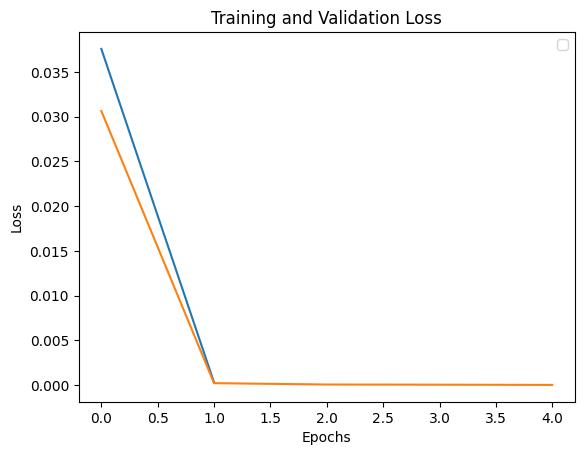

In [67]:
# Plot of the loss curve of the best model from the (1%,5%,10%...) vs the best model incorporating one of the data augmentation techniques
def plot_best_history():
    best_history1 = min(histories, key=lambda x: min(x.history['loss']))
    best_history2 = min(all_histories, key=lambda x: min(x.history['loss']))
    plt.plot(best_history1.history['loss'] )
    plt.plot(best_history2.history['loss'] )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Plot best history for histories
plot_best_history()

## d. Methodology Analysis

#### Our approach to improve the model was trying with all the techniques used on part 2 and see how well they compared vs the model with 100% real data. We noticed that in general the performance of the model increases with this techniques, were we can highlight Zero-Shot as the most effective one, but they show worst improvements compared to increasing the size of the real training data. This is most likely because this techniques can just offer data that could be biased, very simple or limited.

#### In comparison to the SOA model (Roberta) ours performs worse, despite the fact that we are using this Roberta model as our base. When doing a more detailed analysis we realized that the data used in the training of Roberta, the dataset was greatly imbalanced, having nearly a 90% of positive data and just 10% negative. Considering this we concluded that the performance of our model is within the expected performance, we even tried the SOA model in HuggingFace and we got similar results to what we show here.

# Part 4: Model Distillation
## a. Model Distillation

In [68]:
class Distiller(tf.keras.Model):

    def __init__(self, student, teacher):
        super().__init__()
        self.teacher = teacher
        self.student = student

    def compile(self,optimizer,metrics,student_loss_fn,distillation_loss_fn,alpha=0.1,temperature=3,):
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def compute_loss(self, x=None, y=None, y_pred=None, sample_weight=None, allow_empty=False):

        teacher_pred = self.teacher(x, training=False)
        student_loss = self.student_loss_fn(y, y_pred)

        distillation_loss = self.distillation_loss_fn(
            tf.nn.softmax(teacher_pred / self.temperature, axis=1),
            tf.nn.softmax(y_pred / self.temperature, axis=1),
        ) * (self.temperature**2)

        loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss
        return loss

    def call(self, x):
        return self.student(x)


In [70]:
# Create the student model on "distilbert/distilroberta-base"
checkpoint_distil="distilbert/distilroberta-base"
tokenizer_distil = AutoTokenizer.from_pretrained(checkpoint_distil)
model_distil = TFAutoModel.from_pretrained(checkpoint_distil)

## Input
input_ids_in = tf.keras.layers.Input(shape=(max_length,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(max_length,), name='masked_token', dtype='int32')

# Embedding layers
embedding_layer = model_distil(input_ids_in, attention_mask=input_masks_in)[0][:, 0, :]
output_layer = tf.keras.layers.Dropout(rate)(embedding_layer)
output = tf.keras.layers.Dense(num_labels, kernel_initializer="glorot_uniform", activation='softmax')(output_layer)

# One dense layer to process the last layer
output = tf.keras.layers.Dense(num_labels,
                               kernel_initializer="glorot_uniform",
                               activation='softmax')(output_layer)


model_distil = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = output)

model_distil.summary()
student = model_distil

student.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_token (InputLayer)    [(None, 40)]                 0         []                            
                                                                                                  
 masked_token (InputLayer)   [(None, 40)]                 0         []                            
                                                                                                  
 tf_roberta_model (TFRobert  TFBaseModelOutputWithPooli   8211840   ['input_token[0][0]',         
 aModel)                     ngAndCrossAttentions(last_   0          'masked_token[0][0]']        
                             hidden_state=(None, 40, 76                                           
                             8),                                                              

In [71]:
# Test the teacher model
start = time.time()
valid_preds = teacher_model.predict(inputs_valid)
end = time.time()
teacher_time = end-start
valid_preds = np.argmax(valid_preds, axis=1)

20/20 [==============================] - 11s 384ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-3-c69f3aa3134e>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.results.keys(), rotation=55)


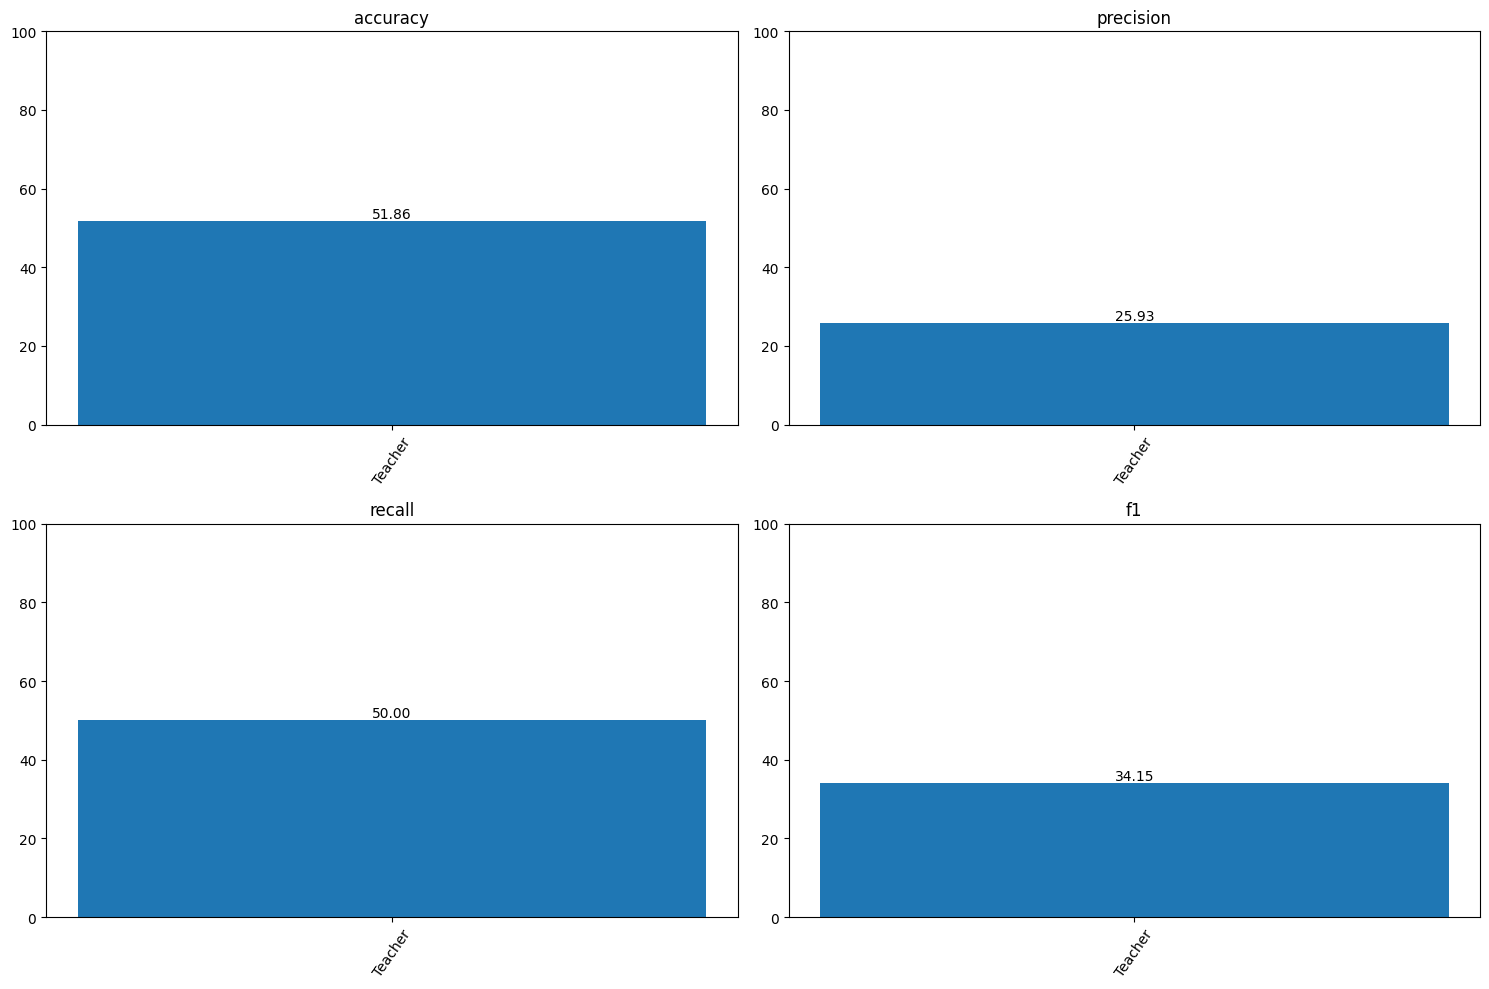

In [72]:
# get the final metrics
metrics_dis= Metrics()
metrics_dis.run(test_labels, valid_preds, "Teacher")
metrics_dis.plot()

In [ ]:
# Initialize and compile distiller
distiller = Distiller(student=student, teacher=teacher_model)
distiller.compile(
    optimizer=Adam(2e-5),
    metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()],
    student_loss_fn=tf.keras.losses.CategoricalCrossentropy(),
    distillation_loss_fn=tf.keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=10,
)
batches_with_progress = tqdm_generator(batches, steps_per_epoch)
# Distill teacher to student
distiller.fit(batches_with_progress, epochs=2, steps_per_epoch=steps_per_epoch)

In [ ]:
# Test the student model
start = time.time()
valid_preds = distiller.predict(inputs_valid)
end = time.time()
student_time = end-start
valid_preds = np.argmax(valid_preds, axis=1)

In [ ]:
# get the final metrics
metrics_dis.run(test_labels, valid_preds, "Student")
metrics_dis.plot()

## b. Performance and Speed Comparison

In [ ]:
# Execution time for the prediction of the same amount of labels:
print(f"Execution time: {teacher_time:.2f} seconds")
print(f"Execution time: {student_time:.2f} seconds")

In [ ]:
teacher_model.summary()

In [ ]:
student.summary()

#### For our distilled model we trained our bert model using "distilbert/distilroberta-base" to improve the computational efficiency.
#### Comparing the our previous model, with the distilbert we can see an improvemente both in time and in memory of around a 30%. Having at the beginning around 124 million parameters on the model, we managed to reduce it to 82 million (Almost 500 MB to 310 MB) which also helped with the speed time of the model.

## c. Analysis and Improvements

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(test_labels, valid_preds)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Student Model')
plt.show()

#### One of the main issues we had when running our models was computer capacity, even when using paid Google Colab, we were still limited by the amount of RAM available to use. We could try to further strengthen our model by increasing the training data and a bigger diversification of it, though as we saw in our analysis, the inclusion of more data wasn't making a huge impact on the performance of the model.
#### We also considered the possibility of using Ensemble models to improve the performance and some of its techniques like Bagging or Stacking. Enhancing the data augmentation techniques with specific methods designed for Twitter sentiment analysis which might consider special characteristics such as hashtags, mentions, emojis, and informal language. Develop new evaluation metrics that might be better suited for this type of predictions, perhaps including multi-class sentiment analysis.